In [2]:
#Using Scikit-Learn for Iris Classification:
#importing libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy using Logistic Regression: {accuracy:.2f}")


Accuracy using Logistic Regression: 1.00


In [15]:
X.shape

(150, 4)

In [10]:
y.shape

(150,)

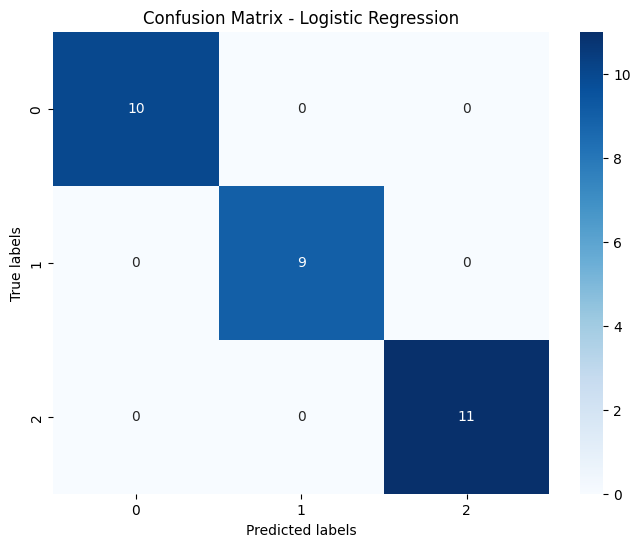

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate predictions using the logistic regression model
y_pred_lr = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [17]:
#Using TensorFlow for Iris Classification:
#importing libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a simple neural network model using TensorFlow/Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, epochs=50, batch_size=32,validation_split=0.2,verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy using TensorFlow: {accuracy:.2f}")


Epoch 1/50
3/3 [==============================] - 3s 151ms/step - loss: 1.0997 - accuracy: 0.3542 - val_loss: 1.0066 - val_accuracy: 0.5833
Epoch 2/50
3/3 [==============================] - 0s 33ms/step - loss: 1.0814 - accuracy: 0.4167 - val_loss: 0.9902 - val_accuracy: 0.5833
Epoch 3/50
3/3 [==============================] - 0s 35ms/step - loss: 1.0653 - accuracy: 0.4479 - val_loss: 0.9750 - val_accuracy: 0.6250
Epoch 4/50
3/3 [==============================] - 0s 33ms/step - loss: 1.0489 - accuracy: 0.5104 - val_loss: 0.9590 - val_accuracy: 0.7083
Epoch 5/50
3/3 [==============================] - 0s 29ms/step - loss: 1.0338 - accuracy: 0.5625 - val_loss: 0.9430 - val_accuracy: 0.7083
Epoch 6/50
3/3 [==============================] - 0s 33ms/step - loss: 1.0182 - accuracy: 0.6042 - val_loss: 0.9268 - val_accuracy: 0.7083
Epoch 7/50
3/3 [==============================] - 0s 24ms/step - loss: 1.0026 - accuracy: 0.6250 - val_loss: 0.9101 - val_accuracy: 0.7083
Epoch 8/50
3/3 [==========

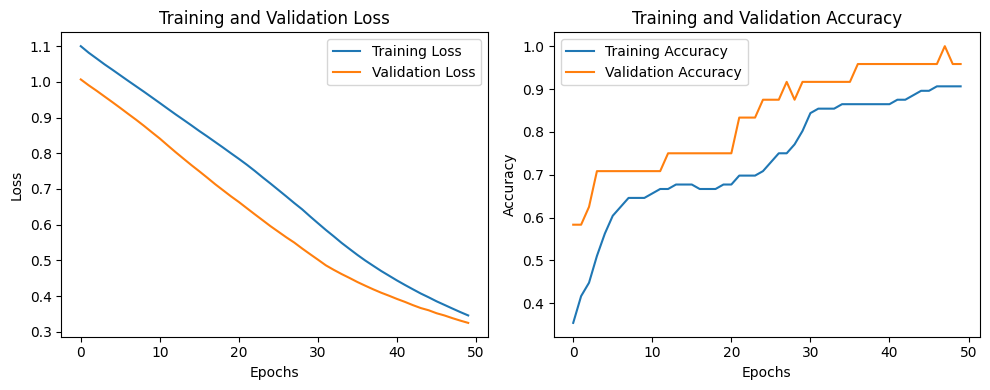

In [18]:
# Plotting training and validation loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
